In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['text.color'] = 'gray'
plt.rcParams['axes.labelcolor'] = 'gray'
plt.rcParams['xtick.color'] = 'gray'
plt.rcParams['ytick.color'] = 'gray'

Part 1

In [2]:
logins = pd.read_json('logins.json')

In [3]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
logins.describe()

/var/folders/mw/twnx7f095wngt0_jb2pglg_m0000gn/T/ipykernel_5204/3844903394.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  logins.describe()


,login_time
count,93142
unique,92265
top,1970-03-17 01:01:39
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [6]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [7]:
logins['count'] = 1

In [8]:
time_index = logins.set_index('login_time')

In [9]:
logins15 = time_index.resample('15T').sum()

In [10]:
logins15.sort_index(inplace=True)

In [11]:
logins15['count'].unique()

array([ 2,  6,  9,  7,  1,  4,  0,  8,  3, 16, 13, 14, 15, 10, 18, 12,  5,
       17, 11, 21, 22, 23, 19, 29, 25, 32, 27, 26, 20, 24, 34, 28, 45, 30,
       38, 33, 42, 31, 36, 46, 40, 43, 50, 35, 39, 41, 37, 73, 48, 47, 51,
       55, 53, 44, 52, 60, 54, 63, 64, 56, 59, 66])

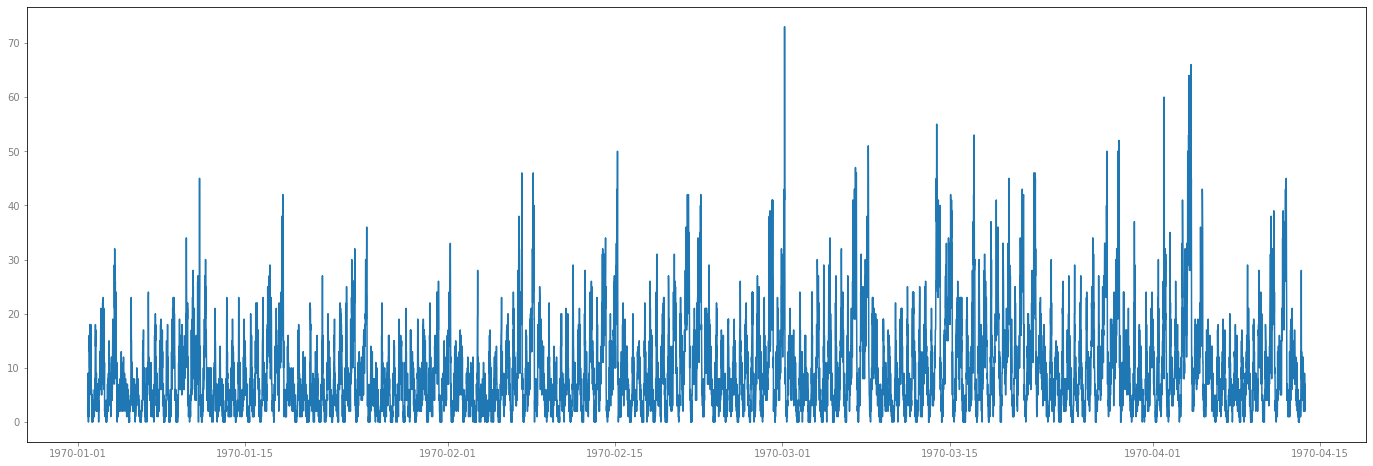

In [12]:
fig, ax = plt.subplots(figsize=(24,8))

plt.plot(logins15.index, logins15['count'])

In [13]:
logins['hour'] = logins['login_time'].dt.strftime('%H')

In [14]:
time_index = logins.set_index('login_time')

In [15]:
logins_tod = time_index.groupby('hour').sum()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


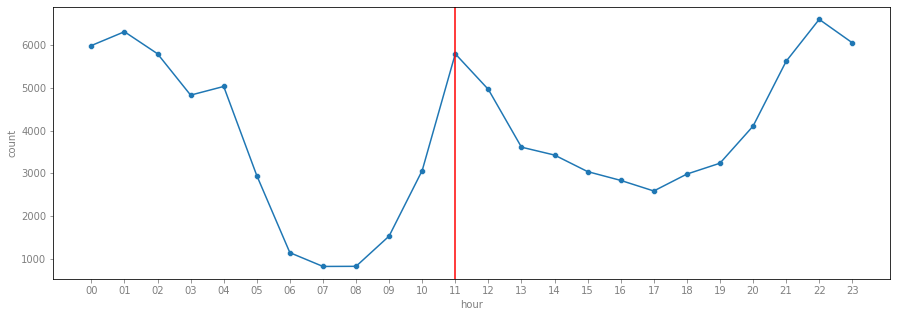

In [16]:
fig, ax = plt.subplots(figsize=(15,5))

sns.scatterplot(logins_tod.index, logins_tod['count'], marker='o')
sns.lineplot(logins_tod.index, logins_tod['count'])
plt.axvline(x=11, c='r')
plt.show()

In [17]:
logins_day = time_index.resample('D').sum()

In [18]:
logins_day['day'] = logins_day.index
logins_day['day'] = logins_day['day'].dt.strftime('%A')

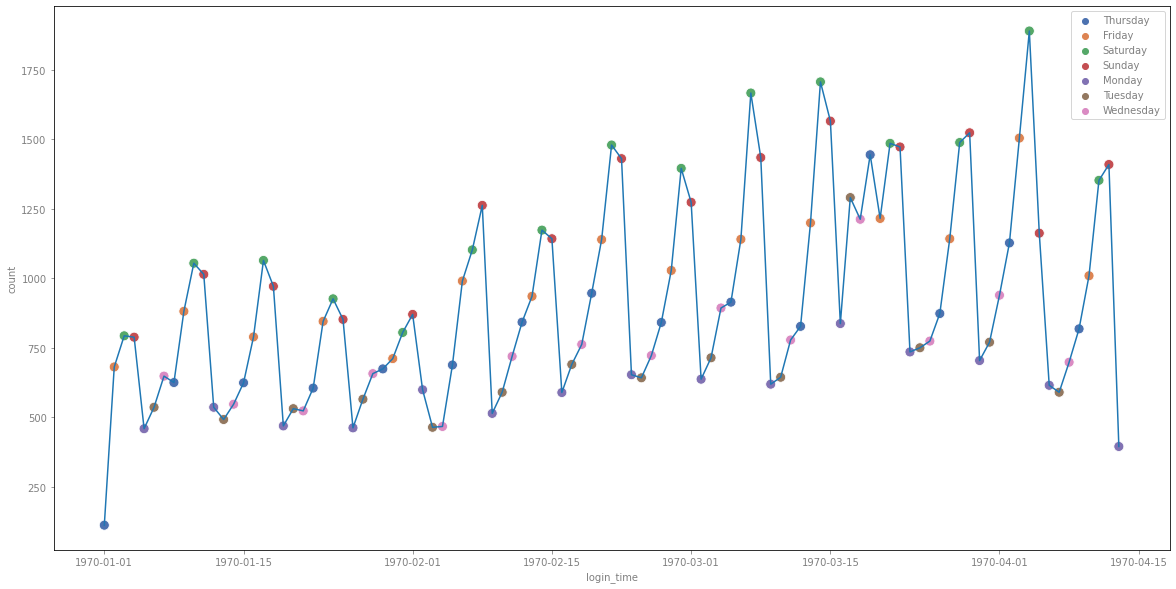

In [19]:
fig, ax = plt.subplots(figsize=(20,10))

sns.scatterplot(x=logins_day.index, y=logins_day['count'], marker='o', hue=logins_day['day'], palette='deep', s=100)
sns.lineplot(x=logins_day.index, y=logins_day['count'])
plt.show()

In [20]:
logins_day['weekend'] = logins_day['day'].isin(['Friday','Saturday','Sunday']).astype('int')

In [21]:
weekend_filter = logins_day['weekend'] == 1

In [22]:
weekends = logins_day[weekend_filter]
week_days = logins_day[~weekend_filter]

In [23]:
weekends['count'].sum()/logins_day['count'].sum()

0.5663610401322712

In [24]:
week_days['count'].sum()/logins_day['count'].sum()

0.4336389598677288

In [25]:
logins_tod['hour'] = logins_tod.index.astype('int')

In [26]:
am = logins_tod[logins_tod.hour <= 11]
pm = logins_tod[logins_tod.hour > 11]

In [27]:
am['count'].sum()/logins_tod['count'].sum()

0.4732666251529922

In [28]:
pm['count'].sum()/logins_tod['count'].sum()

0.5267333748470078

Intially looking at the 15 min intervals, it does not appear to be much cyclical movement for demand. The 15 minute interval is too short to adequately explore this data. By changing the length of the time period we can better explore the dataset. When the data is grouped by hour of the day that login occurs we can see that afternoon hours account for more than half of all application logins. There local maximums in the hourly data at 1 am, 11 am, and 11 pm, and local minimums at 7 am and 5 pm. This suggests that most users login into the app outside of rush hour traffic periods, and outside of usual business hours. This suggests that users do not use the bicycle app to travel/from and during work, most of the usage occurs during leisure time. The spike in usage at 11 am suggests that users may be using the rented bicycles during lunch breaks, possibly as a form of transportation to restaurants or for exercise during lunch hours. The notion that a majority of users are renting bicycles for leisure is further supported when examining the seasonality of the data through a daily scope. Usage typically peaks on weekends (Friday, Saturday, Sunday) and declines to the weekly minimum on Mondays and gradually builds again as Saturday apporaches. There is a week of particular interest in which demand does not follow this pattern, and overall usage appears to be higher than all other weeks. I do not believe that this is due to any sort of error however. When the dates of the week in question are further examined, they appear to be right around when (at least in the US) a typical spring break week would occur. If this were the case, it would only further support the notion that users prefer to rent bicycles as a leisure activity and not a primary method of transportation.

Part 2

1. The fact that drivers in Gotham primarily work at night and drivers in Metropolis primarily work during the day, suggests that there is a need for a smoothing of the supply of drivers across the 2 cities. Reimbursing drivers for the toll to cross between the 2 cities could be an incentive to achieve drive supply smoothing. However, to understand the effect of the toll reimbursement on driver supply Ultimate should begin collecting location data from drivers. More specifically, data on whether or not the drivers cross over a cities geofence throughout the time they are working. The only physical link between the 2 cities is a toll bridge and this provides a convenient boundary between the cities (edge to each geofence). Creating a geofence for each city where the edge of each polygon is at the end of the toll bridge would provide Ultimate with 2 valuable pieces of information. The first piece, that the driver paid a toll. Additionally, that the driver has provided service from one city to the other. The new key metric would then be the amount of trips driver from city A provided while still within the geofence of city B.
2. Prior to implementing toll reimbursement and begining any experimentation collect data on driver home service area, count of trips the driver provides in their home and away city. Calculate the percentage of trips each driver makes currently within their respective home and away cities in regards to their total trips. 
    Once this initial information has been gathered, conduct a simple A/B test on the drivers or city teams. Begin by randomly selecting an equal number
of drivers from each city and implement the toll reimbursement strategy with these drivers (the test group). The remaining drivers continue servicing riders under the current strategy (the control group). Establish the following hypotheses; 
    null hypothesis- Toll reimbursement has no effect on the percentage of trips serviced outside of the drivers home city.
    alternate hypothesis- Toll reimbursement does influence the percentage of trips serviced outside of the drivers home city.
3. Allow the experiment to continue for 3 months and evaluate the KPI for each driver group. Test the significance of the results at the 95% confidence interval against the aforementioned hypotheses. If the results are significant and positively affect the ratio of trips a driver services outside of their home city, then implement the strategy company wide and continue to monitor the results for another 3 month period before making a permanent decision.
A major caveat to this experiment is that it only looks at the supply side influences of the toll reimbursement, driver availability, it does not take into account the demand effects. If the strategy does not increase customer retention or the volume usage. Then it may not be worth implementing the toll reimbursement, because it would add another variable cost to the company's balance sheet without increasing revenues.

Part 3

Load and inspect the data.

In [29]:
data = pd.read_json('ultimate_data_challenge.json')

In [30]:
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [32]:
data.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


The data consists of 50000 observations and 12 features. The features themselves consist of several different data types; categorical, numeric, datetime. The features of avg_rating_of_driver, phone, and avg_rating_by_driver all contain missing values. These features will need to be explored further to determine the best strategies for handling this missing data.

In [33]:
missing_vals = ['avg_rating_of_driver', 'phone', 'avg_rating_by_driver']
for col in missing_vals:
    print(col+ ' values: ', data[col].unique(), end='\n'*2)

avg_rating_of_driver values:  [4.7 5.  4.3 4.6 4.4 3.5 nan 4.5 4.  3.9 4.9 4.8 2.5 3.7 1.  4.1 4.2 3.
 3.8 2.  2.7 3.3 2.8 3.6 3.4 3.2 2.6 3.1 2.9 1.7 1.8 1.5 2.3 1.9 2.1 2.4
 1.6 2.2]

phone values:  ['iPhone' 'Android' None]

avg_rating_by_driver values:  [5.  4.9 4.  3.  4.8 4.7 4.5 4.2 nan 4.4 4.6 3.7 4.3 3.5 2.  3.8 2.5 4.1
 3.9 1.  3.3 3.4 3.6 3.2 2.3 2.8 1.5 2.7]



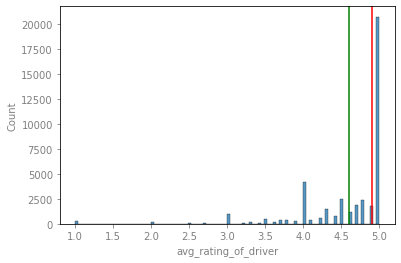

In [34]:
sns.histplot(data.avg_rating_of_driver)
plt.axvline(x=data.avg_rating_of_driver.median(), c='r')
plt.axvline(x=data.avg_rating_of_driver.mean(), c='g')
plt.show()

The data for avg_rating_of_driver appear to primarily consist of 5 star ratings. However, the distribution of all ratings appears to be skewed by extremely low outliers. In order to fill the null values without influencing the overall distribution further, the median should be used to fill said values.

In [35]:
data[data.avg_rating_of_driver.isnull()]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
6,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,Android,0.0,False,100.0,3.95,4.0
9,Winterfell,1,2014-01-03,NaN,1.0,2014-01-05,Android,0.0,False,0.0,2.37,5.0
12,Winterfell,1,2014-01-15,NaN,1.0,2014-03-12,iPhone,0.0,False,100.0,20.29,5.0
14,Astapor,1,2014-01-27,NaN,1.0,2014-01-28,Android,0.0,False,100.0,26.01,5.0
15,Winterfell,1,2014-01-15,NaN,1.0,2014-01-16,Android,0.0,True,100.0,13.20,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
49984,Winterfell,1,2014-01-26,NaN,1.0,2014-01-26,Android,0.0,False,0.0,3.50,5.0
49985,Astapor,1,2014-01-26,NaN,1.0,2014-02-25,Android,0.0,False,100.0,1.38,5.0
49989,Winterfell,1,2014-01-24,NaN,1.0,2014-01-31,iPhone,0.0,False,100.0,0.00,5.0
49996,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0


In [36]:
data.avg_rating_of_driver.fillna(data.avg_rating_of_driver.median(), inplace=True)

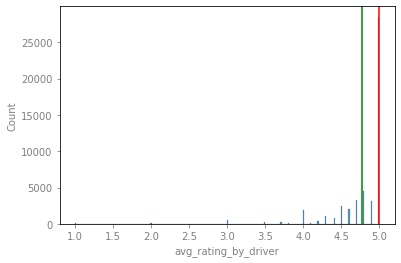

In [37]:
sns.histplot(data.avg_rating_by_driver)
plt.axvline(x=data.avg_rating_by_driver.median(), c='r')
plt.axvline(x=data.avg_rating_by_driver.mean(), c='g')
plt.show()

The avg_rating_by_driver, much like the raiting avg_rating_of_driver, feature consists of primarly 5 star ratings with some extreme outliers. The same strategy of filling with the median value will be used for this variable.

In [38]:
data[data.avg_rating_by_driver.isnull()]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
90,Winterfell,1,2014-01-10,5.0,1.0,2014-02-09,iPhone,0.0,False,0.0,6.28,NaN
274,Astapor,1,2014-01-25,2.0,4.0,2014-02-09,iPhone,100.0,False,0.0,6.00,NaN
277,Winterfell,1,2014-01-25,4.9,1.0,2014-01-26,iPhone,0.0,False,0.0,1.82,NaN
536,Winterfell,1,2014-01-18,5.0,1.0,2014-02-08,Android,0.0,False,100.0,1.41,NaN
857,Winterfell,0,2014-01-11,4.0,1.0,2014-03-16,iPhone,0.0,False,0.0,0.42,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
49249,King's Landing,0,2014-01-14,5.0,1.0,2014-06-19,iPhone,0.0,True,100.0,4.60,NaN
49376,Astapor,1,2014-01-20,4.0,1.0,2014-01-24,iPhone,0.0,False,100.0,3.01,NaN
49504,Winterfell,2,2014-01-24,5.0,1.0,2014-01-25,Android,0.0,False,100.0,0.75,NaN
49599,King's Landing,1,2014-01-14,5.0,1.0,2014-02-08,iPhone,0.0,False,100.0,2.48,NaN


In [39]:
data.avg_rating_by_driver.fillna(data.avg_rating_by_driver.median(), inplace=True)

In [40]:
data[data.phone.isnull()]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
134,King's Landing,0,2014-01-10,5.0,1.00,2014-06-11,None,0.0,False,100.0,2.88,5.0
176,Astapor,0,2014-01-28,5.0,1.00,2014-03-18,None,0.0,False,100.0,20.32,5.0
320,Astapor,1,2014-01-08,5.0,1.00,2014-01-09,None,0.0,False,100.0,31.01,5.0
349,Winterfell,1,2014-01-06,3.3,1.00,2014-06-22,None,0.0,True,33.3,6.03,5.0
389,King's Landing,5,2014-01-26,4.9,1.02,2014-07-01,None,3.0,False,66.7,3.08,4.8
...,...,...,...,...,...,...,...,...,...,...,...,...
49587,Winterfell,1,2014-01-17,5.0,1.00,2014-01-19,None,0.0,True,0.0,1.15,3.0
49627,Astapor,6,2014-01-05,5.0,1.00,2014-01-25,None,0.0,True,33.3,3.10,4.5
49666,Winterfell,2,2014-01-22,4.9,1.00,2014-01-23,None,0.0,True,100.0,0.73,5.0
49825,Astapor,0,2014-01-25,5.0,1.00,2014-03-10,None,0.0,True,50.0,5.82,5.0


In [41]:
data.phone.value_counts()

iPhone     34582
Android    15022
Name: phone, dtype: int64

In [42]:
len(data[data.phone.isnull()])/len(data)

0.00792

The missing values in the phone category is less than 1 percent which is well within the acceptable range of less than 5 percent, so these values could be dropped all together. However, it may be helpful to retain as much data as possible at first and then evaluate preliminary model performance before deciding to drop data. In the US, iPhone OS accounts for around 45 percent of all mobile phone users and Android OS accounts for roughly 54 percent of all users. Leaving around 1 percent of mobile phone users in the Other category of OS. Since the missing data is .7 percent it would make sense to fill these missing values with 'Other'. Allowing us to keep all of the data in the model and not lose any important aspects of this OS distribution.

In [43]:
data.phone.fillna(value='Other', inplace=True)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   50000 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


The data no longer has missing values. Now we can create the target feature 'retained_user', and create new features for all of the categorical variables. Finally, we can explore the relationships between this target variable and the cleaned features.

In [45]:
data['retained_user'] = abs(pd.to_datetime(data.last_trip_date) - pd.to_datetime(data.last_trip_date.max())) < '30 days'

In [46]:
retained_filter = data['retained_user'] == True

In [47]:
retention_rate =len(data[retained_filter])/len(data)

In [48]:
retention_rate

0.3662

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    50000 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   50000 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    50000 non-null  float64
 12  retained_user           50000 non-null  bool   
dtypes: bool(2), float64(6), int64(1), object(4)
memory usage: 4.3+ MB


In [50]:
bool_features = ['ultimate_black_user', 'retained_user']
for feature in bool_features:
    data[feature] = data[feature] * 1

In [51]:
data.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained_user
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,1,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,0,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,0,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,1,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,0,82.4,3.13,4.9,0


In [52]:
data_dummies = pd.get_dummies(data, columns=['city', 'phone'], prefix='')

In [53]:
data_dummies.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained_user,_Astapor,_King's Landing,_Winterfell,_Android,_Other,_iPhone
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,1,46.2,3.67,5.0,1,0,1,0,0,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,0,50.0,8.26,5.0,0,1,0,0,1,0,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,0,100.0,0.77,5.0,0,1,0,0,0,0,1
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,1,80.0,2.36,4.9,1,0,1,0,0,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,0,82.4,3.13,4.9,0,0,0,1,1,0,0


In [54]:
data_dummies.signup_date = pd.to_datetime(data_dummies.signup_date)
data_dummies.last_trip_date = pd.to_datetime(data_dummies.last_trip_date)

In [55]:
data_dummies.signup_date = data_dummies.signup_date.dt.dayofyear \
    - data_dummies.signup_date.dt.dayofyear.min() + 1

In [56]:
data_dummies.last_trip_date = data_dummies.last_trip_date.dt.dayofyear \
    - data_dummies.last_trip_date.dt.dayofyear.min()

In [57]:
categorical = data_dummies[['retained_user', 'ultimate_black_user', '_Astapor', '_King\'s Landing', '_Winterfell', '_Android', '_iPhone', '_Other']]

In [58]:
numeric = data_dummies[['retained_user', 'trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver', 'signup_date', 'last_trip_date']]

In [59]:
cat_correlation = categorical.corr()
num_correlation = numeric.corr()

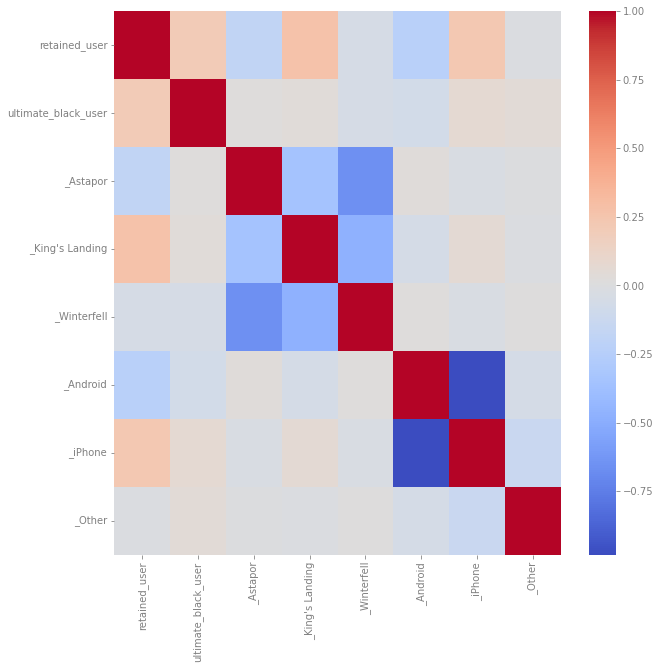

retained_user          1.000000
ultimate_black_user    0.210259
_Astapor              -0.179373
_King's Landing        0.268272
_Winterfell           -0.046985
_Android              -0.231731
_iPhone                0.231391
_Other                -0.007032
Name: retained_user, dtype: float64


In [60]:
plt.figure(figsize=(10,10))
sns.heatmap(cat_correlation, cmap='coolwarm')
plt.show()
print(cat_correlation.iloc[0, :])

As seen in the above heatmap, we can see that the target variable is positively correlated with ultimate_black_user status (premium user), _King's Landing city location, iPhone OS phone. The positive correlation with ultimate_black_user is logical as it can be reasonably assumed that user's with a premium status are more likely to continue to be loyal to the company and product with which they hold said status. The correlations with city location suggests that perhaps there are characteristics of the cities, service availability, or the users themselves that are driving a higher correlation rate of user retainership and location. Finally the positive iPhone OS correlation would suggest that perhaps the app performs better/has greater support for users of this platform.

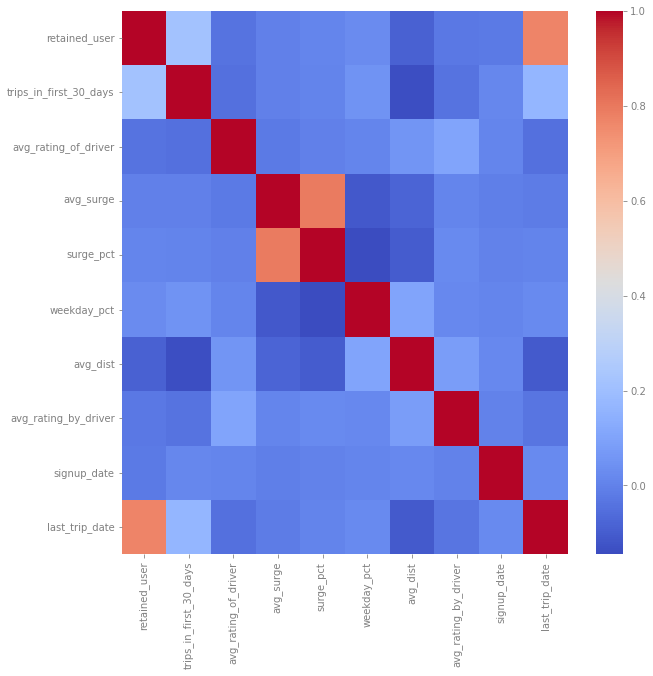

retained_user             1.000000
trips_in_first_30_days    0.214728
avg_rating_of_driver     -0.040165
avg_surge                -0.003567
surge_pct                 0.010612
weekday_pct               0.026413
avg_dist                 -0.090279
avg_rating_by_driver     -0.026400
signup_date              -0.020572
last_trip_date            0.770932
Name: retained_user, dtype: float64


In [61]:
plt.figure(figsize=(10,10))
sns.heatmap(num_correlation, cmap='coolwarm')
plt.show()
print(num_correlation.iloc[0, :])

In [62]:
data_dummies.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained_user,_Astapor,_King's Landing,_Winterfell,_Android,_Other,_iPhone
0,4,25,4.7,1.10,167,15.4,1,46.2,3.67,5.0,1,0,1,0,0,0,1
1,0,29,5.0,1.00,124,0.0,0,50.0,8.26,5.0,0,1,0,0,1,0,0
2,3,6,4.3,1.00,6,0.0,0,100.0,0.77,5.0,0,1,0,0,0,0,1
3,9,10,4.6,1.14,179,20.0,1,80.0,2.36,4.9,1,0,1,0,0,0,1
4,14,27,4.4,1.19,73,11.8,0,82.4,3.13,4.9,0,0,0,1,1,0,0


Drop last_trip_date because that information is already in our target variable retained_user and could lead to performance issues if included in the model. Drop the first dummy variable for both city and phone categories, because the inclusion of a dummy variable for every category leads to multicolinearity within the model.

In [63]:
model_data = data_dummies.drop(['last_trip_date', '_Astapor', '_Other'], axis=1)

In [64]:
model_data

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained_user,_King's Landing,_Winterfell,_Android,_iPhone
0,4,25,4.7,1.10,15.4,1,46.2,3.67,5.0,1,1,0,0,1
1,0,29,5.0,1.00,0.0,0,50.0,8.26,5.0,0,0,0,1,0
2,3,6,4.3,1.00,0.0,0,100.0,0.77,5.0,0,0,0,0,1
3,9,10,4.6,1.14,20.0,1,80.0,2.36,4.9,1,1,0,0,1
4,14,27,4.4,1.19,11.8,0,82.4,3.13,4.9,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,25,5.0,1.00,0.0,0,100.0,5.63,4.2,1,1,0,0,1
49996,1,24,4.9,1.00,0.0,0,0.0,0.00,4.0,0,0,0,0,1
49997,0,31,5.0,1.00,0.0,1,100.0,3.86,5.0,0,0,1,1,0
49998,2,14,3.0,1.00,0.0,0,100.0,4.58,3.5,0,0,0,0,1


Create pipelines for 3 different classification models and choose the best performing model to further tune for the final scoring.

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline

In [66]:
y = model_data.pop('retained_user')
X = model_data

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)

In [68]:
scaler = StandardScaler()
scaler_param = ('Scaler', scaler)

In [69]:
dum = DummyClassifier(strategy='most_frequent')
logreg = LogisticRegression()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()

In [70]:
dummy_pipe = Pipeline([scaler_param, ('Dummy Classifier', dum)])
logreg_pipe = Pipeline([scaler_param, ('Logistic Regression', logreg)])
knn_pipe = Pipeline([scaler_param, ('KNN Classifier', knn)])
rf_pipe = Pipeline([scaler_param, ('Random Forest Classifier', rf)])

In [71]:
pipes = [dummy_pipe, logreg_pipe, knn_pipe, rf_pipe]
for pipe in pipes:
    cv_score = cross_val_score(pipe, X_train, y_train,\
                               scoring='f1', cv=5)
    name = str(pipe[1])
    score = (str(name.split('(')[0])+' f1: '+ str(np.mean(np.abs(cv_score))))
    print(score)

DummyClassifier f1: 0.0
LogisticRegression f1: 0.5701193230416846
KNeighborsClassifier f1: 0.638659807561831
RandomForestClassifier f1: 0.680995478787734


The classes are imbalanced and this could ultimately be affecting the ml models' ability to accurately predict class outcomes. Using a synthetic minority oversampling technique (SMOTE) we can potentially increase the accuracy further. It is important to perform the train test split prior to utilizing this technique, because it can cause information from the test set to bleed into the training set.

In [72]:
from imblearn.over_sampling import SMOTENC

In [73]:
sm = SMOTENC(categorical_features=[5, 9, 10, 11, 12], sampling_strategy='minority', k_neighbors=5, random_state=42)

In [74]:
X_smote, y_smote = sm.fit_resample(X_train, y_train) 

In [75]:
pipes = [dummy_pipe, logreg_pipe, knn_pipe, rf_pipe]
for pipe in pipes:
    cv_score = cross_val_score(pipe, X_smote, y_smote,\
                               scoring='f1', cv=5)
    name = str(pipe[1])
    score = (str(name.split('(')[0])+' f1: '+ str(np.mean(np.abs(cv_score))))
    print(score)

DummyClassifier f1: 0.2666491354940504
LogisticRegression f1: 0.6932594092875409
KNeighborsClassifier f1: 0.7752814767911199
RandomForestClassifier f1: 0.8130253593310977


The balancing has greatly improved the performance of all models on the train data. The Random Forest model still outperforms the others, and we can proceed with hyper parameter tuning on the Random Forest model with Random Search CV and Grid Search CV.

In [76]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [77]:
params = {'n_estimators':range(50,150,2), 'max_depth':range(3,10),\
                   'max_features': range(1, 15), 'min_samples_leaf': range(1, 15),\
                   'criterion': ['gini', 'entropy']}

In [78]:
randomized = RandomizedSearchCV(estimator = rf,\
    param_distributions = params, scoring='f1', n_iter = 120,\
    cv=5, verbose=1)

In [79]:
random_rf = randomized.fit(X_smote, y_smote)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
35 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site

In [80]:
print("Best Random parameters found: ", randomized.best_params_)
print("Highest Random F1 found: ", randomized.best_score_)

Best Random parameters found:  {'n_estimators': 144, 'min_samples_leaf': 2, 'max_features': 8, 'max_depth': 9, 'criterion': 'gini'}
Highest Random F1 found:  0.7906863077998793


In [81]:
import pickle
with open('ultimate_classifier', 'wb') as f:
    pickle.dump(random_rf, f)

pickle_in = open('ultimate_classifier', 'rb')
random_rf = pickle.load(pickle_in)

In [82]:
# grid_params = {'n_estimators':[62, 84, 100, 142], \
#     'max_depth':[8,9,10],\
#     'max_features': [2,4,6],\
#     'min_samples_leaf': [2,4,7],\
#     'criterion': ['gini']}

In [83]:
# grid = GridSearchCV(estimator = rf,\
#     param_grid = grid_params, scoring='f1',\
#     cv=5, verbose=1)

In [84]:
# grid_rf = grid.fit(X_smote, y_smote)

In [85]:
# print("Best Grid parameters found: ", grid_rf.best_params_)
# print("Highest Grid F1 found: ", grid_rf.best_score_)

In [86]:
# import pickle
# with open('ultimate_classifier', 'wb') as f:
#     pickle.dump(grid_rf, f)

# pickle_in = open('ultimate_classifier', 'rb')
# grid_rf = pickle.load(pickle_in)

In [87]:
# predictions = grid_rf.predict(X_test)
rand_preds = random_rf.predict(X_test)

In [88]:
from sklearn.metrics import confusion_matrix

In [89]:
# confusion_matrix(y_test, predictions)

In [90]:
confusion_matrix(y_test, rand_preds)

array([[5175, 1163],
       [1034, 2628]])

In [91]:
# predictions_proba = grid_rf.predict_proba(X_test)[:,1]

# scores_df = pd.DataFrame([{'Accuracy score':sklearn.metrics.accuracy_score(y_test, predictions),\
#     'F1 score':(sklearn.metrics.f1_score(y_test, predictions)),  \
#     'AUC score': sklearn.metrics.roc_auc_score(y_test, predictions_proba)}])

scores_df

NameError: name 'scores_df' is not defined

In [ ]:
rand_proba = random_rf.predict_proba(X_test)[:,1]

rand_scores = pd.DataFrame([{'Accuracy score':sklearn.metrics.accuracy_score(y_test, rand_preds),\
    'F1 score':(sklearn.metrics.f1_score(y_test, rand_preds)),  \
    'AUC score': sklearn.metrics.roc_auc_score(y_test, rand_proba)}])

rand_scores

,Accuracy score,F1 score,AUC score
0,0.7789,0.702062,0.851512


In [ ]:
def plot_roc_curve(fpr,tpr):
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

In [ ]:
# false_positive_rate, true_positive_rate, thresholds = sklearn.metrics.roc_curve(y_test, predictions_proba)
# plot_roc_curve(false_positive_rate, true_positive_rate)
# print('AUC: ', round(scores_df.iloc[0][2],3))

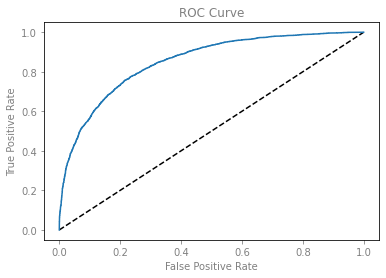

AUC:  0.852


In [ ]:
rand_fp_rate, rand_tp_rate, thresholds = sklearn.metrics.roc_curve(y_test, rand_proba)
plot_roc_curve(rand_fp_rate, rand_tp_rate)
print('AUC: ', round(rand_scores.iloc[0][2],3))

The tuned model performs well on the test data. The model is both accurate, with a accuracy score of .778, and performs well in regards to both precision and recall, with an F1 score of .702. AUC score of .852 suggests the model does a fairly good job separating observations between retained users and those not retained.

In [ ]:
rf_classifier = RandomForestClassifier(**random_rf.best_params_).fit(X_smote, y_smote)

In [ ]:
pd.DataFrame({'col_name': rf_classifier.feature_importances_}, index=X_smote.columns).sort_values(by='col_name', ascending=False)

,col_name
avg_rating_by_driver,0.327094
_King's Landing,0.133965
_Android,0.124837
surge_pct,0.089789
avg_surge,0.066217
avg_rating_of_driver,0.060973
weekday_pct,0.056300
trips_in_first_30_days,0.045721
ultimate_black_user,0.043297
avg_dist,0.029892


The tuned model found that the most important features in explaining user retention were avg_rating_by_driver, _King's Landing, and _Android. With this information in mind, the company should pay special attention to how new policies will affect these variables and in turn user retention. For example, if the company seeks to further increase user retention it could insentivise higher avg_rating_by_driver (the most important feature) users to continue to use the app via discounts during surge times (4th most important feature).